# 머신러닝 기초2

In [1]:
import pandas as pd
import numpy as np

iris = pd.read_csv('iris.csv')
adv = pd.read_csv('advertising.csv')

## 01. 분류와 회귀

### 분류
다음은 iris 꽃에 대한 dataset이다.   
`Species`을 target값으로 하는, 즉, 꽃의 종류를 종속변수 y로 하는 분류문제에 해당한다.
   
     
     
- `Id` : 일련번호  
- `SepalLengthCm` : 꽃받침 길이 (cm)   
- `SepalWidthCm` : 꽃받침 넓이 (cm)  
- `PetalLengthCm` : 꽃잎 길이 (cm)  
- `PetalWidthCm` : 꽃잎 넓이 (cm)
- `Species` : 꽃 종류 (setosa, versicolor, virginica)

In [2]:
# 꽃의 종류가 3가지이므로 다중분류 문제에 해당한다.
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 회귀
다음은 광고와 판매에 대한 dataset이다.  
`Sales`를 target값으로 하는, 즉, 판매량을 종속변수 y로 하는 회귀문제에 해당한다.
   
- `TV` : TV 광고량  
- `Radio` : 라디오 광고량
- `Newspaper` : 신문 광고량
- `Sales` : 총 판매량

In [3]:
# Sales가 연속적인 값이기에 회귀 문제에 해당한다.
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 03. 교차검증

In [4]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.model_selection import cross_val_score

### Hold-Out Cross Validation
#### 데이터셋을 train set, validation set, test set 세 개로 나누어 train set으로 모델을 훈련시키고, validation set으로 성능을 평가한 후, test set을 이용하여 모델의 일반화 성능을 추정하는 교차 검증 방법   

- 장점 : Test set을 넣기 전 이미 validation set으로 성능을 평가하기 때문에 모델의 예측 성능을 측정할 수 있다
- 한계 : validation set으로 쓸 데이터는 훈련에 쓰이지 않기 때문에 데이터 자원을 낭비한다.

<img src='https://www.datavedas.com/wp-content/uploads/2018/04/image003.jpg'>

In [5]:
X = iris.iloc[:,1:-1]
y = iris['Species']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
    
print('Train 데이터 비율 : {}'.format(len(X_train)/len(X)))
print('Validation 데이터 비율 : {}'.format(len(X_val)/len(X)))
print('Test 데이터 비율 : {}'.format(len(X_test)/len(X)))

Train 데이터 비율 : 0.64
Validation 데이터 비율 : 0.16
Test 데이터 비율 : 0.2


### K-Fold Cross Validation
#### 데이터셋을 K개로 나누어 하나씩 test set으로 사용하고 나머지를 trian set으로 사용하는 교차검증 방법  
- 장점 : 모든 데이터셋을 train set으로도, test set으로도 활용 가능
- 단점 : 여전히 데이터가 편향되어 있을 경우, 편향된 데이터가 분할되지 못하고 몰릴 수 있음
<img src='https://www.researchgate.net/profile/B-Aksasse/publication/326866871/figure/fig2/AS:669601385947145@1536656819574/K-fold-cross-validation-In-addition-we-outline-an-overview-of-the-different-metrics-used.jpg'>

In [7]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
kfold_iris = KFold(n_splits=3)
cnt_iter = 0 
for train_idx, test_idx in kfold_iris.split(iris):
    cnt_iter += 1
    label_train = iris['Species'].iloc[train_idx]
    label_test = iris['Species'].iloc[test_idx]
    
    print('** 교차검증: {} **'.format(cnt_iter))
    print('학습 레이블 데이터 분포 : \n' , label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n' , label_test.value_counts())
    print('\n')

** 교차검증: 1 **
학습 레이블 데이터 분포 : 
 Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-setosa    50
Name: Species, dtype: int64


** 교차검증: 2 **
학습 레이블 데이터 분포 : 
 Iris-setosa       50
Iris-virginica    50
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-versicolor    50
Name: Species, dtype: int64


** 교차검증: 3 **
학습 레이블 데이터 분포 : 
 Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-virginica    50
Name: Species, dtype: int64




### Stratified K-Fold Cross Validation
#### target 속성값의 개수를 동일하게 하여 데이터가 한 곳으로 몰리는 것을 방지하는 교차검증방법  
  
iris data는 target값이 setosa, versicolor, virginica로 나뉘는데 위 결과를 보면    
- 교차검증 1 : versicolor와 virginica만 학습하여 setosa라는 답을 도출할 수 없다.  
- 교차검증 2 : setosa와 virginica만 학습하여 versicolor라는 답을 도출할 수 없다.  
- 교차검증 3 : setosa와 versicolor만 학습하여 virginica라는 답을 도출할 수 없다.    
  
    
       
따라서 이러한 K-fold의 문제점을 보완하기 위해 나오게 되었다.

<img src ='https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_009.png'>

In [9]:
kfold_iris = StratifiedKFold(n_splits=3)
cnt_iter = 0 
for train_idx, test_idx in kfold_iris.split(iris, iris['Species']):
    cnt_iter += 1
    label_train = iris['Species'].iloc[train_idx]
    label_test = iris['Species'].iloc[test_idx]
    
    print('** 교차검증: {} **'.format(cnt_iter))
    print('학습 레이블 데이터 분포 : \n' , label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n' , label_test.value_counts())
    print('\n')

** 교차검증: 1 **
학습 레이블 데이터 분포 : 
 Iris-virginica     34
Iris-setosa        33
Iris-versicolor    33
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-setosa        17
Iris-versicolor    17
Iris-virginica     16
Name: Species, dtype: int64


** 교차검증: 2 **
학습 레이블 데이터 분포 : 
 Iris-versicolor    34
Iris-setosa        33
Iris-virginica     33
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-setosa        17
Iris-virginica     17
Iris-versicolor    16
Name: Species, dtype: int64


** 교차검증: 3 **
학습 레이블 데이터 분포 : 
 Iris-setosa        34
Iris-versicolor    33
Iris-virginica     33
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-versicolor    17
Iris-virginica     17
Iris-setosa        16
Name: Species, dtype: int64




#### sklearn은 k-fold 교차검증을 편리하게 수행할 수 있는 API인 cross_val_score라는 함수를 제공
- 폴드 세트를 지정하고, for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 후, 반복적으로 학습과 예측을 수행하는 일련의 과정을 한 번에 수행해 주는 API  
- 분류의 경우 자동으로 Stratifies KFold 방식을 진행해준다.
  
   cross_val_score (estimator, X, y, scoring = 평가지표, cv = 교차검증 폴드 수) 

In [10]:
model = DecisionTreeClassifier()
scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = 3)
print('교차 검증별 정확도 :', np.round(scores, 4))
print('교차 검증 평균 :', np.round(np.mean(scores), 4))

교차 검증별 정확도 : [0.98 0.92 0.98]
교차 검증 평균 : 0.96


### Leave-One-Out Cross Validation
#### 교차검증을 극단적으로 사용한 것으로 n개의 데이터 샘플에서 한 개의 데이터 샘플을 test set으로 하고, 그 1개를 뺀 나머지를 train set으로 두고 모델을 검증하는 교차 검증 방법  
- 장점 : 훈련에 거의 데이터셋의 전부를 사용하기 때문에 모델 성능에 대한 신뢰를 할 수 있고 편향되지 않은 추정치를 제공한다.    
- 단점 : 계산 비용이 많이 든다.

<img src='https://miro.medium.com/max/1050/0*oHrfoOeToTpdkmHX.png'>

In [11]:
loo_iris = LeaveOneOut()
cnt_iter = 0 
for train_idx, test_idx in loo_iris.split(iris):
    cnt_iter += 1
    label_train = iris['Species'].iloc[train_idx]
    label_test = iris['Species'].iloc[test_idx]
    
    print('** 교차검증: {} **'.format(cnt_iter))
    print('학습 레이블 데이터 분포 : \n' , label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n' , label_test.value_counts())
    print('\n')

** 교차검증: 1 **
학습 레이블 데이터 분포 : 
 Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-setosa    1
Name: Species, dtype: int64


** 교차검증: 2 **
학습 레이블 데이터 분포 : 
 Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-setosa    1
Name: Species, dtype: int64


** 교차검증: 3 **
학습 레이블 데이터 분포 : 
 Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-setosa    1
Name: Species, dtype: int64


** 교차검증: 4 **
학습 레이블 데이터 분포 : 
 Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-setosa    1
Name: Species, dtype: int64


** 교차검증: 5 **
학습 레이블 데이터 분포 : 
 Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-setosa    1
Name: Species, dtype: int64


** 교차검증: 6 **
학습 레이블 데이터 분포 : 
 Iris-versicol

 Iris-virginica    1
Name: Species, dtype: int64


** 교차검증: 126 **
학습 레이블 데이터 분포 : 
 Iris-setosa        50
Iris-versicolor    50
Iris-virginica     49
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-virginica    1
Name: Species, dtype: int64


** 교차검증: 127 **
학습 레이블 데이터 분포 : 
 Iris-setosa        50
Iris-versicolor    50
Iris-virginica     49
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-virginica    1
Name: Species, dtype: int64


** 교차검증: 128 **
학습 레이블 데이터 분포 : 
 Iris-setosa        50
Iris-versicolor    50
Iris-virginica     49
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-virginica    1
Name: Species, dtype: int64


** 교차검증: 129 **
학습 레이블 데이터 분포 : 
 Iris-setosa        50
Iris-versicolor    50
Iris-virginica     49
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-virginica    1
Name: Species, dtype: int64


** 교차검증: 130 **
학습 레이블 데이터 분포 : 
 Iris-setosa        50
Iris-versicolor    50
Iris-virginica     49
Name: Species, dtype: int64
검증 레이블 데이터 분포 : 
 Iris-virginica    1

## 04. 회귀 평가지표  
#### 실제값과 예측값의 차이가 작을 수록 모델의 성능이 좋다는 것을 의미한다.


In [12]:
X = adv.iloc[:,:-1]
y = adv['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

### MSE & RMSE
#### - MSE (평균 제곱 오차)   
    : 실제값과 예측값의 차이를 제곱하여 평균한 것
      
      
#### - RMSE (평균 제곱근 오차)   
    : MSE에 루트를 씌운 것   

In [13]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 2.0712499999999996
RMSE : 1.4391837964624252


### MAE(평균 절대 오차)  
    : 실제값과 예측값의 차이를 절댓값으로 변환해 평균한 것

In [14]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, pred)

print('MAE :', MAE)

MAE : 0.9824999999999997


### MAPE (평균 절대 비율 오차)  
    : MAE를 비율(％)로 표현한 것

In [15]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
mape = MAPE(y_test, pred)

print('MAPE :', mape)

MAPE : 6.872849633884118


## 05. 분류 평가지표
#### 실제값과 예측값이 일치하는 수가 많을수록 모델의 성능이 좋다는 것을 의미한다.

### Confusion Matrix(오차행렬)

<img align="left" src="http://drive.google.com/uc?export=view&id=1wIJIJENLCnfoesuTUMDjywPLMJnat36E" width=700 height=500>

In [30]:
iris = iris[iris['Species'] != "Iris-virginica"]

X = iris.iloc[:,:-1]
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

model = DecisionTreeClassifier(max_depth=1, max_features=1, max_leaf_nodes=2, random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


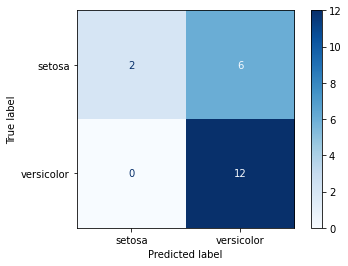

In [17]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

plot_confusion_matrix(model, X_test, y_test, display_labels=["setosa", "versicolor"], cmap=plt.cm.Blues)
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[ 2,  6],
       [ 0, 12]], dtype=int64)

In [19]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print('tn, fp, fn, tp :', tn, fp, fn, tp)

tn, fp, fn, tp : 2 6 0 12


### Accuracy(정확도)
    : 전체 데이터 중, 정확하게 예측한 데이터의 비율

In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)

print('Accuracy :', accuracy)

Accuracy : 0.7


### Specificity(특이도)
    : Negative로 예측한 것 중, 진짜 Negative의 비율

In [21]:
specificity = tn/(tn + fp)

print('Specificity :', specificity)

Specificity : 0.25


### Precision(정밀도)
    : Positive로 예측한 것 중, 진짜 Positive의 비율

In [22]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, pred, pos_label = 'Iris-versicolor')
# Iris-setosa를 positive로 두고 계산한 것

print('Precision :', precision)

Precision : 0.6666666666666666


### Recall(재현율) = Sensitivity(민감도)
    : 진짜 positive인 것 중, 올바르게 Positive로 예측한 비율

In [23]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, pred, pos_label = 'Iris-versicolor')

print('Recall :', recall)

Recall : 1.0


### F1-Score
    : Precision과 Recall을 이용하여 조화평균을 구한 지표

In [24]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred, pos_label = 'Iris-versicolor')

print('F1 Score :', f1)

F1 Score : 0.8


### ROC-AUC
    : ROC curve의 밑부분 면적인 AUC가 넓을수록 모델 성능이 높아지는 것을 의미한다.
    
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F262E8E3F544837AD27'>

#### ROC curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


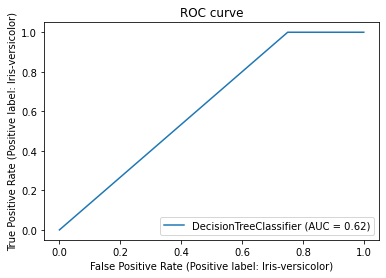

In [25]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)
plt.title('ROC curve')
plt.show()

In [26]:
model.predict_proba(X_test) # setosa일 확률, versicolor일 확률

array([[0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.96551724, 0.03448276],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.96551724, 0.03448276],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ],
       [0.2745098 , 0.7254902 ]])

In [27]:
model.predict(X_test)

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) # AUC 
print('ROC_AUC_score :', ROC_AUC)

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label='Iris-versicolor')
print('AUC: ', auc(fpr, tpr))

ROC_AUC_score : 0.625
AUC:  0.625
